<a href="https://colab.research.google.com/github/SAISKAND/Python-projects/blob/main/ML_Algorithms_scratch/Data_Visualization/text1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
text_path='/content/drive/MyDrive/Data for ML lab/Text data/anime.txt'
import pandas as pd
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
lst=[]
with open(text_path,'r') as file:
    for line in file:
        for word in line.split():
            lst.append(word)
print(lst)
stop_words = stopwords.words('english')
lst=[word.lower() for word in lst]
lst=[word for word in lst if len(word)>2]
lst = [word for word in lst if word not in stop_words]
print(lst)
df=pd.DataFrame(lst)#convert list to dataframe
df.rename(columns = {0:'Words'}, inplace = True) #renaming column
#df['Words']=df['Words'].str.replace('[#,@,&,[,],(,),,,]','')
df['Words'] = df['Words'].apply(lambda x: ''.join(char for char in x if char.isalpha() or char.isspace()))#remving special characters
nan_value = float("NaN")
df.replace("", nan_value, inplace=True) #Removing nulls
df[df['Words'].notnull()].reset_index(drop=True,inplace=True)
df

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['Anime', '(Japanese:', 'アニメ,', 'IPA:', '[aꜜɲime]', 'ⓘ)', 'is', 'hand-drawn', 'and', 'computer-generated', 'animation', 'originating', 'from', 'Japan.', 'Outside', 'Japan', 'and', 'in', 'English,', 'anime', 'refers', 'specifically', 'to', 'animation', 'produced', 'in', 'Japan.[1]', 'However,', 'in', 'Japan', 'and', 'in', 'Japanese,', 'anime', '(a', 'term', 'derived', 'from', 'a', 'shortening', 'of', 'the', 'English', 'word', 'animation)', 'describes', 'all', 'animated', 'works,', 'regardless', 'of', 'style', 'or', 'origin.', 'Many', 'works', 'of', 'animation', 'with', 'a', 'similar', 'style', 'to', 'Japanese', 'animation', 'are', 'also', 'produced', 'outside', 'Japan.', 'Video', 'games', 'sometimes', 'also', 'feature', 'themes', 'and', 'artstyles', 'that', 'can', 'be', 'considered', 'as', '"anime".', 'The', 'earliest', 'commercial', 'Japanese', 'animation', 'dates', 'to', '1917.', 'A', 'characteristic', 'art', 'style', 'emerged', 'in', 'the', '1960s', 'with', 'the', 'works', 'of', 'car

,Words
0,anime
1,japanese
2,アニメ
3,ipa
4,aꜜɲime
...,...
4611,estimated
4612,highestgrossing
4613,media
4614,franchise


In [ ]:
group = df.groupby(['Words']).size().reset_index(name="count")
group = group.sort_values(by = ['count'],ascending = False)
group.drop(1464,inplace=True)
group

,Words,count
93,anime,219
89,animation,78
901,japanese,70
900,japan,39
1505,series,37
...,...,...
782,help,1
780,heights,1
779,height,1
778,heidi,1


<Axes: title={'center': 'count'}>

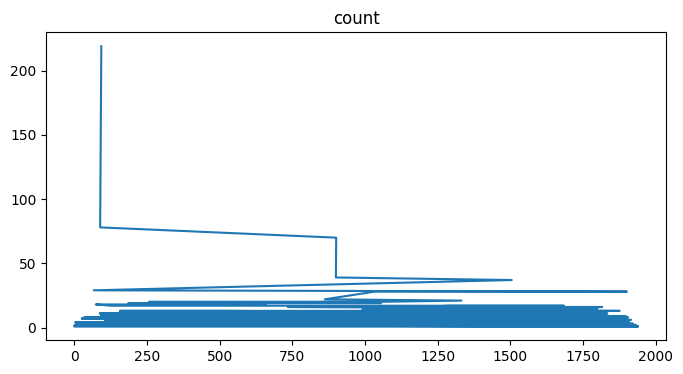

In [ ]:
from matplotlib import pyplot as plt
group['count'].plot(kind='line', figsize=(8, 4), title='count')

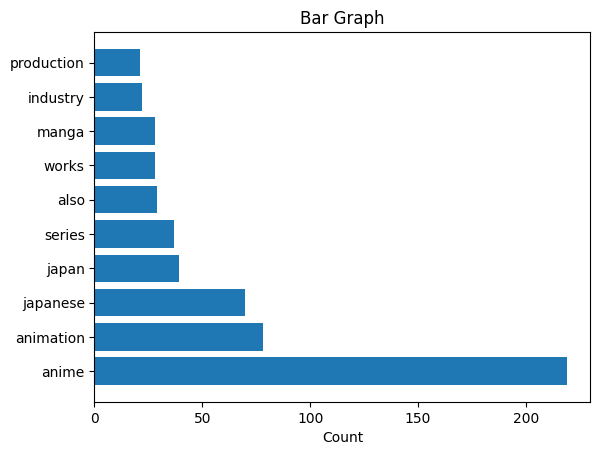

In [ ]:
import matplotlib.pyplot as plt
bar_plot=group.head(10)
plt.barh(bar_plot['Words'],bar_plot['count'])
plt.title("Bar Graph")
plt.xlabel('Count')
plt.show()

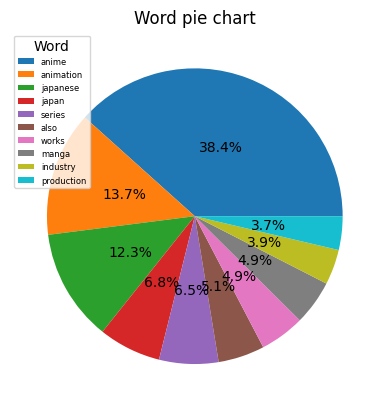

In [ ]:
pie_plot=group.head(10)
plt.pie(pie_plot['count'],autopct='%1.1f%%',pctdistance=0.5)
plt.title('Word pie chart')
plt.legend(title = "Word",labels=group['Words'],loc="upper left", fontsize=6)
plt.show()

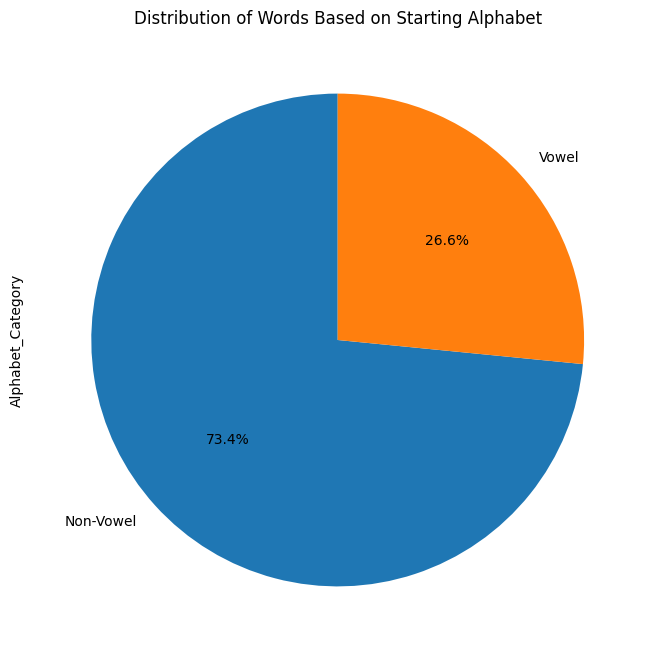

In [ ]:

def categorize_alphabet(word):
    if pd.notna(word) and word[0].lower() in ['a', 'e', 'i', 'o', 'u']:
        return 'Vowel'
    else:
        return 'Non-Vowel'
df['Alphabet_Category'] = df['Words'].apply(categorize_alphabet)
plt.figure(figsize=(8, 8))
df['Alphabet_Category'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Words Based on Starting Alphabet')
plt.show()

Word Cloud


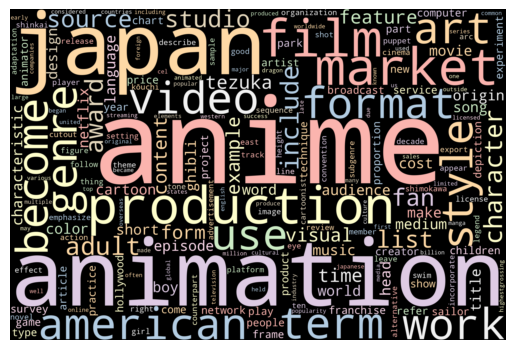

In [ ]:
from wordcloud import WordCloud, STOPWORDS
comment_words = ''
stopwords = set(STOPWORDS)
text = " ".join(char for char in group.Words)
wordcloud = WordCloud(
        width=3000,
        height=2000,
        random_state=1,
        background_color="black",
        colormap="Pastel1",
        collocations=False,
        stopwords=STOPWORDS,).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


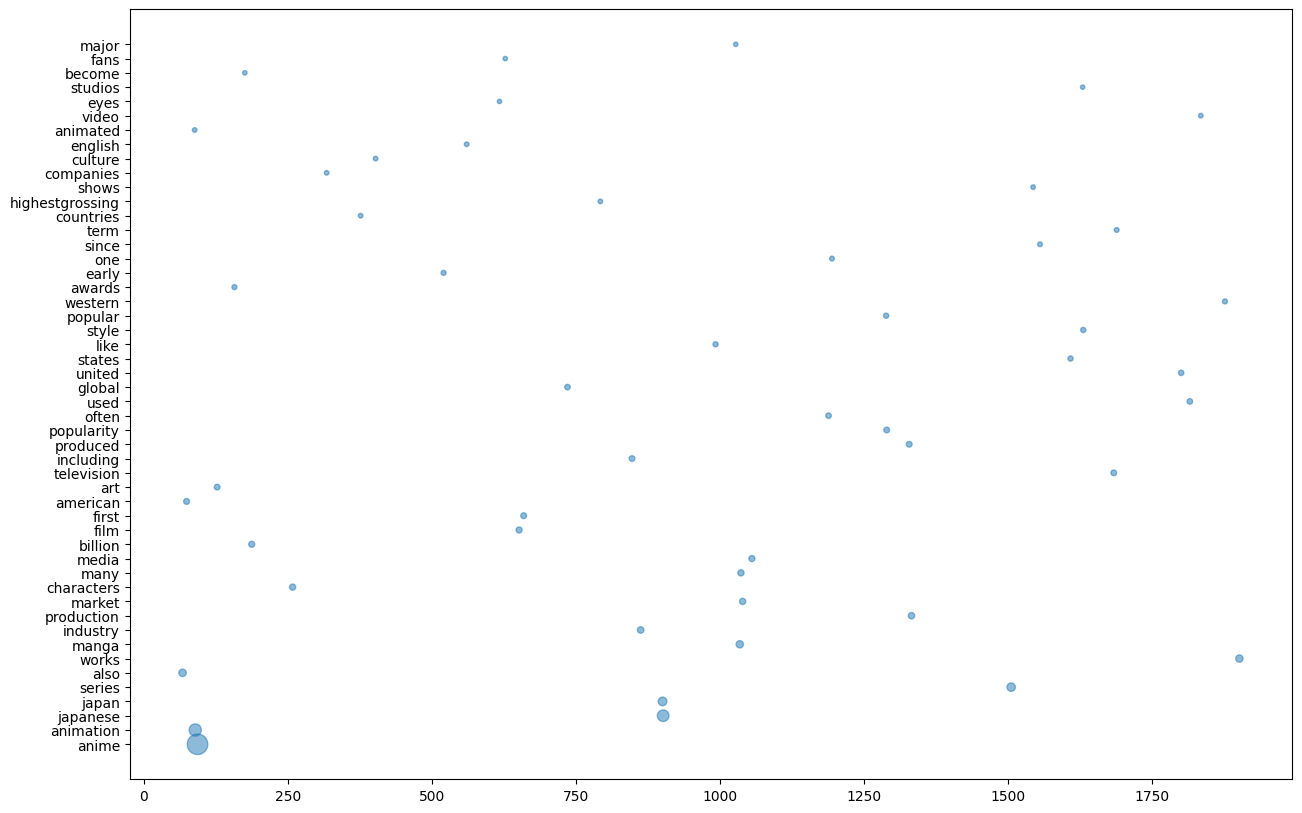

In [ ]:
plt.figure(figsize = (15,10))
scat=group.head(50)
# Create scatterplot. alpha controls the opacity and s controls the size.
plt.scatter(scat.index,scat['Words'], alpha = 0.5,s = scat['count'])
plt.show()